## WU Questions

### WU1: 

**Why is this computation equivalent to computing classification accuracy?**

The statement within the mean function returns a 1 if the prediction is correct and a 0 if the prediction is incorrect. The mean function then takes the average of all the 1s and 0s, which is the same as the classification accuracy.

As reference, accuracy is $$\dfrac{TP + TN}{TP + TN + FP + FN}$$, which is the same as the probability that the classification is done correctly, which corresponds to the mean of that function.

### WU2:

Training classifier on 2 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 3 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 5 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 10 points...
Training accuracy 1, test accuracy 0.595
Training classifier on 19 points...
Training accuracy 1, test accuracy 0.48
Training classifier on 38 points...
Training accuracy 1, test accuracy 0.62
Training classifier on 75 points...
Training accuracy 1, test accuracy 0.56
Training classifier on 150 points...
Training accuracy 0.953333, test accuracy 0.56
Training classifier on 300 points...
Training accuracy 0.926667, test accuracy 0.575
Training classifier on 600 points...
Training accuracy 0.881667, test accuracy 0.5975
Training classifier on 1200 points...
Training accuracy 0.833333, test accuracy 0.6475


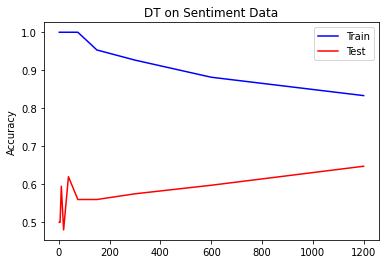

In [1]:
import dt
from imports import *

curve = runClassifier.learningCurveSet(dt.DT({'maxDepth': 9}), datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data', curve)

**We should see training accuracy (roughly) going down and test accuracy (roughly) going up. Why does training accuracy tend to go down? Why is test accuracy not monotonically increasing? You should also see jaggedness in the test curve toward the left. Why?**

Training accuracy tends to go down as we have more data points because when we have more data points, the error rate on the training data will increase as a large training set is more difficult to fit into.

Test accuracy is not monotonically increasing because the first few data points are data that the model has never seen before, and are naturally expected to be inaccurate. But once the model has seen enough data points, it will be able to make more accurate predictions.

The jaggedness in the test curve toward the left is also because the model is unable to form accurate predictions for the first few never-seen-before data in the test set.

### WU3:

Training classifier with maxDepth=1...
Training accuracy 0.630833, test accuracy 0.595
Training classifier with maxDepth=2...
Training accuracy 0.6675, test accuracy 0.5825
Training classifier with maxDepth=4...
Training accuracy 0.7325, test accuracy 0.6375
Training classifier with maxDepth=6...
Training accuracy 0.789167, test accuracy 0.635
Training classifier with maxDepth=8...
Training accuracy 0.823333, test accuracy 0.6475
Training classifier with maxDepth=12...
Training accuracy 0.863333, test accuracy 0.6425
Training classifier with maxDepth=16...
Training accuracy 0.888333, test accuracy 0.625


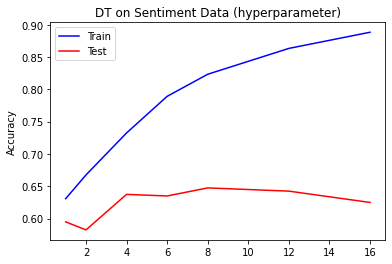

In [2]:
curve = runClassifier.hyperparamCurveSet(dt.DT({}), 'maxDepth', [1,2,4,6,8,12,16], datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data (hyperparameter)', curve)

**You should see training accuracy monotonically increasing and test accuracy making something like a hill. Which of these is guaranteed to happen and which is just something we might expect to happen? Why?**

Training accuracy is guaranteed to monotonically increase because it is training the model and learning and becoming better. This is what we are training for and therefore is what we are guaranteed to see.

Test accuracy making something like a hill is expected because we are now testing our model on unseen data and the more training data there is, the more the model tends to overfit the training data, and the less the model will be able to fit the test data.

### WU4:

**For the digits data, generate train/test curves for varying values of `K` and `epsilon` (you figure out what are good ranges, this time). Include those curves: do you see evidence of overfitting and underfitting? Next, using `K=5`, generate learning curves for this data.**

**To plot learning curves for KNN, you can use `learningCurveSet_knn` and `learningCurve_knn` in `runClassifier.py`.**